<a href="https://colab.research.google.com/github/GuihJF/python_for_data_analysis/blob/main/Brazilian_public_travel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Project Introduction:
# Real data on Brazilian public travel expenses by job position.

# Author Details:
name = "Guilherme"
age = 25
country = "Brazil"
current_role = "Service Desk Specialist – Global L1 Support"
aspiration = "Data Analyst / Data Engineer"
skills = ["Python", "Excel", "SQL", "Power BI", "Tech Support"]

# Project Focus:
project_title = "Python for Data: From Scratch to Complete Analysis"
project_goal = (
    "Applying practical Python skills to read, clean, analyze, and interpret data. "
    "This notebook demonstrates my ability to work with real-world datasets using essential data analysis tools and functions."
)

In [11]:
import pandas as pd
import re
import locale
from openpyxl.cell.cell import ILLEGAL_CHARACTERS_RE

from google.colab import drive
drive.mount('/content/drive')

# Display all columns and format floats
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load raw data
year = 2023
data_path = f'/content/drive/MyDrive/AD/{year}_Viagem.csv'
df = pd.read_csv(data_path, sep=';', encoding='latin1')

# Remove illegal Excel characters
def clean_text(text):
    if isinstance(text, str):
        return ILLEGAL_CHARACTERS_RE.sub("", text)
    return text

df_clean = df.applymap(clean_text)

# Output paths
output_table_path = f'/content/drive/MyDrive/AD/output/table_{year}.xlsx'
output_chart_path = f'/content/drive/MyDrive/AD/output/chart_{year}.png'

# Save cleaned table to Excel
df_clean.to_excel(output_table_path, index=False)

# Show texts that were altered
df_diff = df[df.applymap(lambda x: clean_text(x) if isinstance(x, str) else x) != df]
print(df_diff)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-11-1895300887.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df.applymap(clean_text)
/tmp/ipython-input-11-1895300887.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_diff = df[df.applymap(lambda x: clean_text(x) if isinstance(x, str) else x) != df]


        Identificador do processo de viagem Número da Proposta (PCDP)  \
0                                       NaN                       NaN   
1                                       NaN                       NaN   
2                                       NaN                       NaN   
3                                       NaN                       NaN   
4                                       NaN                       NaN   
...                                     ...                       ...   
831006                                  NaN                       NaN   
831007                                  NaN                       NaN   
831008                                  NaN                       NaN   
831009                                  NaN                       NaN   
831010                                  NaN                       NaN   

       Situação Viagem Urgente Justificativa Urgência Viagem  \
0           NaN            NaN                           Na

In [12]:
# Setting no limit for columns visualization:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Telling Pandas how the data's organized, separated by semicolons and comma:
df_trips = pd.read_csv(data_path, encoding='Windows-1252', sep=';', decimal=",")

# Creating new 'expenses' column:
df_trips['Despesas'] = df_trips['Valor diárias'] + df_trips['Valor passagens'] + df_trips['Valor outros gastos']

# Adjusting null values ​​in the job title column:
df_trips['Cargo'] = df_trips['Cargo'].fillna('INDEFINIDO')

# Converting date columns:
df_trips['Período - Data de início'] = pd.to_datetime(df_trips['Período - Data de início'], format = '%d/%m/%Y')
df_trips['Período - Data de fim'] = pd.to_datetime(df_trips['Período - Data de fim'], format = '%d/%m/%Y')

# New date columns creation:
df_trips['Mês da viagem'] = df_trips['Período - Data de início'].dt.month_name()
df_trips['Dias de viagem'] = (df_trips['Período - Data de fim'] - df_trips['Período - Data de início']).dt.days

In [13]:
# Grouping the data by job position and calculating:
df_trips_consolidado = (df_trips
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'), # average expenses
        duracao_media=('Dias de viagem', 'mean'), # average trip duration
        despesas_totais=('Despesas', 'sum'), # total expenses
        destino_mais_frequente=('Destinos', pd.Series.mode), # most frequent destination
        n_viagens=('Nome', 'count') # number of trips

    )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False))  # Sort by total expenses (highest first)

# Get the proportion of trips for each job position
# Then filter only those with more than 1% of the total
df_cargos = df_trips['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']

# Create a filter for relevant job positions only
filtro = df_trips_consolidado['Cargo'].isin(cargos_relevantes)

# Apply the filter and sort by number of trips (most to least)
df_final = df_trips_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

# Save the final table to an Excel file (without row index)
df_final.to_excel(output_table_path, index=False)

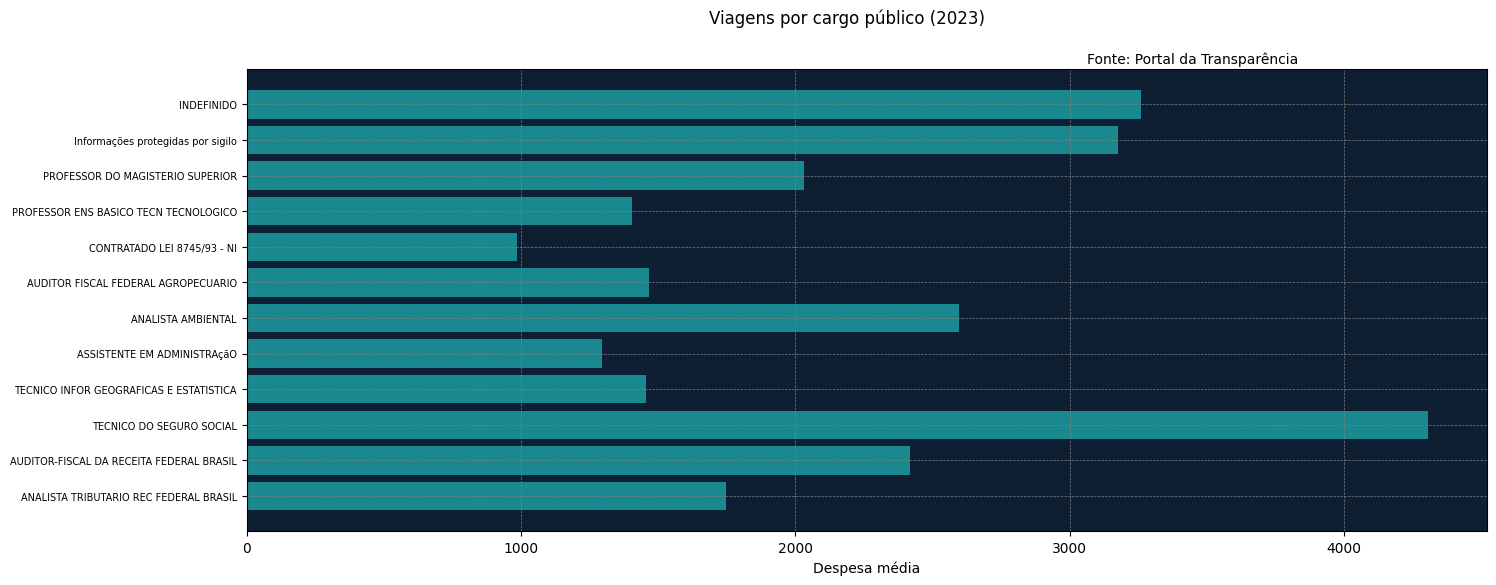

In [14]:
import matplotlib.pyplot as plt

# Figure Creation
fig, ax = plt.subplots(figsize=(16, 6))

# Graph Definition
ax.barh(df_final['Cargo'], df_final['despesa_media'], color='#1a898f')
ax.invert_yaxis()

# Adjustment Graph
ax.set_facecolor('#0e1f33')
fig.suptitle('Viagens por cargo público (2023)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=7)
plt.xlabel('Despesa média')

# Saving the Graph
plt.savefig(output_chart_path, bbox_inches='tight')

In [15]:
print("✅ Analysis completed successfully!")
print("📊 Chart saved at:", output_chart_path)
print("📁 Excel table saved using Pandas 📈 and visualized with Matplotlib 🎨")
print("By: Guilherme Francisco")

✅ Analysis completed successfully!
📊 Chart saved at: /content/drive/MyDrive/AD/output/chart_2023.png
📁 Excel table saved using Pandas 📈 and visualized with Matplotlib 🎨
By: Guilherme Francisco
